In [9]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

path = kagglehub.dataset_download("fedesoriano/traffic-prediction-dataset")

file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, file))
print(df)

Using Colab cache for faster access to the 'traffic-prediction-dataset' dataset.
                  DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]


In [10]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month

df['congestion_level'] = pd.cut(df['Vehicles'],
                                bins=[-1, 10, 30, 60, 1000],
                                labels=[0, 1, 2, 3])

features = ['Junction', 'Hour', 'DayOfWeek', 'Month']
X = df[features]
y = df['congestion_level']
print(X)
print(y)

       Junction  Hour  DayOfWeek  Month
0             1     0          6     11
1             1     1          6     11
2             1     2          6     11
3             1     3          6     11
4             1     4          6     11
...         ...   ...        ...    ...
48115         4    19          4      6
48116         4    20          4      6
48117         4    21          4      6
48118         4    22          4      6
48119         4    23          4      6

[48120 rows x 4 columns]
0        1
1        1
2        0
3        0
4        0
        ..
48115    1
48116    1
48117    1
48118    1
48119    1
Name: congestion_level, Length: 48120, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [11]:
X = pd.get_dummies(X, columns=['Junction'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 7.90461184e-01 -9.99922998e-01  3.06797907e-02 -6.60984456e-01
   1.52213831e+00 -3.15748626e-01]
 [ 2.12523143e-01  1.00200314e+00  1.43301798e+00 -6.60984456e-01
   1.52213831e+00 -3.15748626e-01]
 [-1.23232196e+00  5.01521604e-01  1.71348562e+00 -6.60984456e-01
   1.52213831e+00 -3.15748626e-01]
 ...
 [ 6.80386326e-02 -1.50040453e+00  1.15255034e+00 -6.60984456e-01
   1.52213831e+00 -3.15748626e-01]
 [ 7.90461184e-01  1.04006969e-03 -1.37165840e+00 -6.60984456e-01
  -6.56970520e-01 -3.15748626e-01]
 [ 6.80386326e-02 -9.99922998e-01 -2.49787847e-01  1.51289488e+00
  -6.56970520e-01 -3.15748626e-01]]
[[-0.94335294 -1.50040453  1.71348562 -0.66098446 -0.65697052 -0.31574863]
 [-0.50989941 -0.999923    0.8720827  -0.66098446 -0.65697052 -0.31574863]
 [ 0.93494569 -0.999923    1.71348562 -0.66098446  1.52213831 -0.31574863]
 ...
 [-0.65438392  0.5015216  -1.09119076 -0.66098446  1.52213831 -0.31574863]
 [ 0.21252314 -0.999923   -1.09119076  1.51289488 -0.65697052 -0.31574863]
 [ 0.068

Accuracy: 0.5999584372402328
Precision: 0.5963130487177429
Recall: 0.5999584372402328
F1 Score: 0.5974016799088779


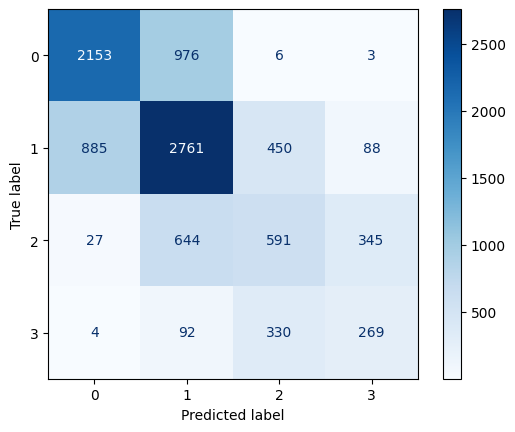

In [12]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

cm_disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.show()

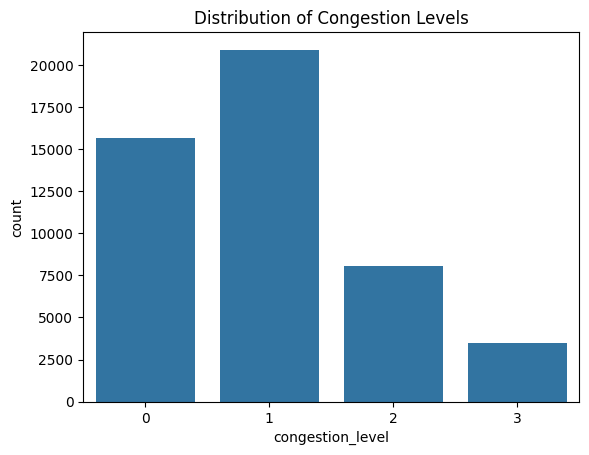

In [14]:
import seaborn as sns

sns.countplot(x='congestion_level', data=df)
plt.title("Distribution of Congestion Levels")
plt.show()


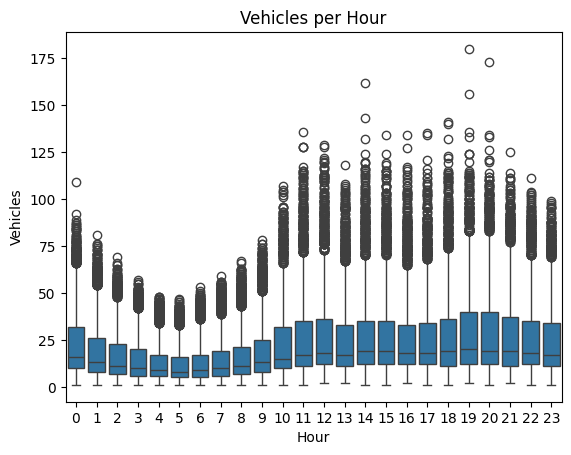

In [15]:
sns.boxplot(x='Hour', y='Vehicles', data=df)
plt.title("Vehicles per Hour")
plt.show()

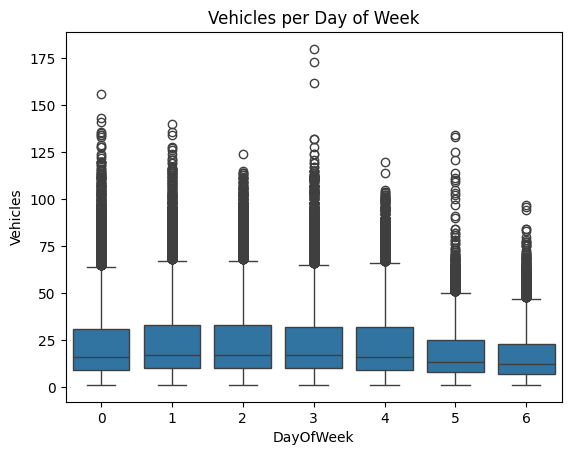

In [16]:
sns.boxplot(x='DayOfWeek', y='Vehicles', data=df)
plt.title("Vehicles per Day of Week")
plt.show()

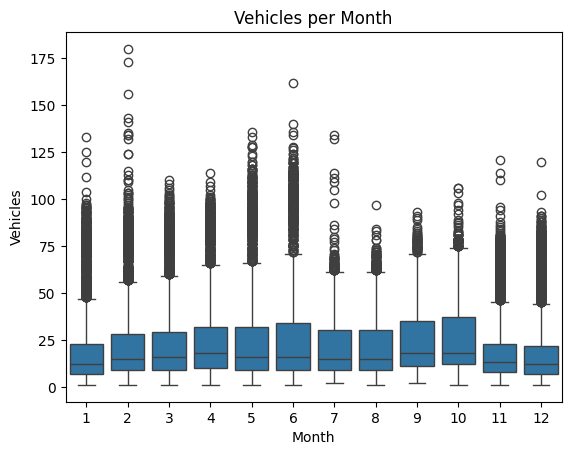

In [17]:
sns.boxplot(x='Month', y='Vehicles', data=df)
plt.title("Vehicles per Month")
plt.show()

In [18]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

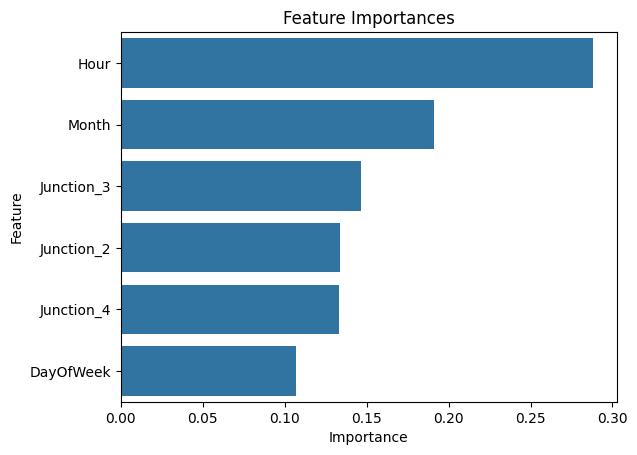

In [19]:
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importances")
plt.show()

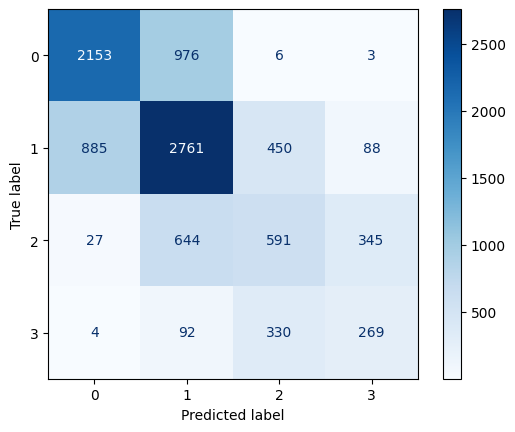

In [20]:
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.show()